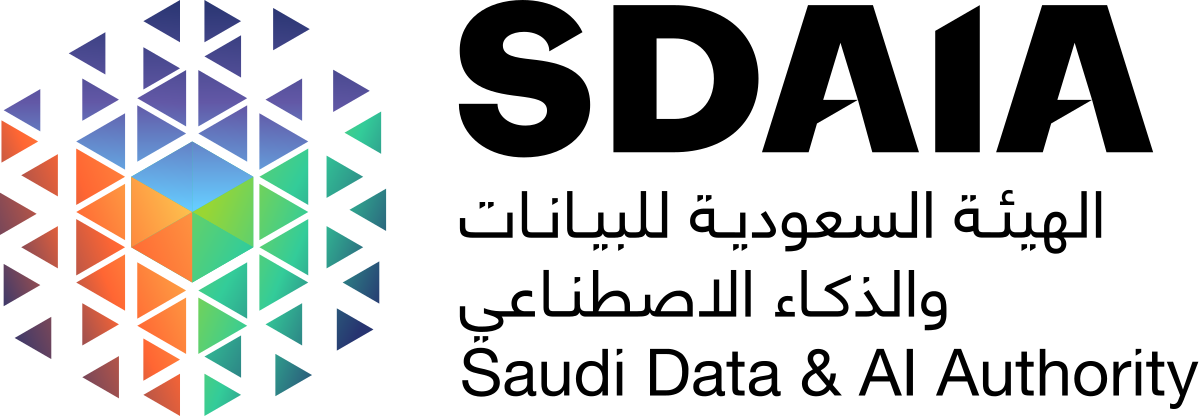

 <font color='teal'><h1>Predict Player Performance by apply Machine Learning Model</font> <font color='midnightblue'><h1>Done by: Shimaa Mishal Alghamdi</font> 

### <font color='rosybrown'>The goal of the project aims to apply Data Science technologies and machine learning algorithms to predict player football performance by using "player_Attributes" </font>


https://www.kaggle.com/hugomathien/soccer 


<hr>

## <font color='teal'>Import libraries</font>

In [33]:
import pandas as pd # For red file
import matplotlib.pyplot as plt # For plot
from sklearn.model_selection import train_test_split # Default splitting

## <font color='teal'>Read and show dataset</font>

In [34]:
data = pd.read_csv('/content/players.csv') #Read dataset

In [35]:
data.head() # Shows the first 5 rows of data

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2/18/2016,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,6,189615,155782,4/21/2016,74.0,76.0,left,high,medium,80.0,53.0,58.0,71.0,40.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,62.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
2,7,189615,155782,4/7/2016,74.0,76.0,left,high,medium,80.0,53.0,58.0,71.0,32.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,60.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
3,8,189615,155782,1/7/2016,73.0,75.0,left,high,medium,79.0,52.0,57.0,70.0,29.0,71.0,68.0,69.0,68.0,70.0,79.0,78.0,78.0,67.0,90.0,71.0,84.0,79.0,56.0,59.0,67.0,66.0,58.0,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
4,39,186170,162549,1/7/2016,65.0,67.0,right,medium,medium,64.0,58.0,60.0,66.0,52.0,66.0,67.0,63.0,62.0,67.0,77.0,74.0,85.0,51.0,92.0,61.0,65.0,66.0,71.0,57.0,60.0,55.0,64.0,68.0,61.0,23.0,22.0,24.0,16.0,11.0,12.0,9.0,13.0


## <font color='teal'>Show the number of rows and columns</font>

In [36]:
data.shape

(14103, 42)

In [37]:
data.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

<hr>

## <font color='midnightblue'> Pre-processing stage </font>
## <font color='lightsteelblue'> 3 Steps in Data Preprocessing </font>


## <font color='teal'> First Step: Data Cleaning </font>

**Remove unnecessary features as id - player_fifa_api_id.....etc**



In [38]:
data = data.drop(['id', 'player_fifa_api_id', 'player_api_id', 'date','gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],axis=1)

In [39]:
data.columns

Index(['overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle'],
      dtype='object')


## <font color='teal'>1. Deal with Missing values </font>


In [76]:
data.isnull().sum(axis = 1) # check 

0        0
1        0
2        0
3        0
4        0
        ..
14098    0
14099    0
14100    0
14101    0
14102    0
Length: 11891, dtype: int64

In [77]:
data = data.dropna(axis=0) # Drop it  

In [78]:
data.shape

(11891, 36)


## <font color='teal'> 2. Check dublicated rows </font>


In [43]:
duplicateDFRow = data[data.duplicated()] # check 
print(duplicateDFRow)

       overall_rating  potential  ... standing_tackle sliding_tackle
7                77.0       77.0  ...            34.0           35.0
16               70.0       72.0  ...            31.0           37.0
20               82.0       85.0  ...            74.0           68.0
22               55.0       63.0  ...            47.0           45.0
24               64.0       68.0  ...            64.0           64.0
...               ...        ...  ...             ...            ...
14048            65.0       66.0  ...            22.0           18.0
14064            75.0       76.0  ...            73.0           63.0
14068            73.0       73.0  ...            16.0           18.0
14083            72.0       72.0  ...            49.0           54.0
14087            65.0       65.0  ...            26.0           18.0

[2207 rows x 33 columns]


In [44]:
data = data.drop_duplicates() # Drop it
data.shape

(11891, 33)


## <font color='teal'>Second Step: Data Transformation </font>


## <font color='lightsteelblue'> Models work with the numbers (So, remove the string values) by using labelencoder </font>

In [45]:
# Print type of coulmn to check String values
data.dtypes

overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
crossing               float64
finishing              float64
heading_accuracy       float64
short_passing          float64
volleys                float64
dribbling              float64
curve                  float64
free_kick_accuracy     float64
long_passing           float64
ball_control           float64
acceleration           float64
sprint_speed           float64
agility                float64
reactions              float64
balance                float64
shot_power             float64
jumping                float64
stamina                float64
strength               float64
long_shots             float64
aggression             float64
interceptions          float64
positioning            float64
vision                 float64
penalties              float64
marking                float64
standing_tackle        float64
sliding_

In [46]:
data['preferred_foot'].value_counts()

right    8914
left     2977
Name: preferred_foot, dtype: int64

In [47]:
data['attacking_work_rate'].value_counts()

medium    7504
high      3735
low        513
None       139
Name: attacking_work_rate, dtype: int64

In [48]:
data['defensive_work_rate'].value_counts()

medium    8202
high      2297
low       1253
1           35
2           28
6           18
7           17
0           17
5           12
3            4
9            3
8            3
4            2
Name: defensive_work_rate, dtype: int64

In [79]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['preferred_foot_incoder'] = labelencoder.fit_transform(data['preferred_foot'])
data['attacking_work_rate_incoder'] = labelencoder.fit_transform(data['attacking_work_rate'])
data['defensive_work_rate_incoder'] = labelencoder.fit_transform(data['defensive_work_rate'])
data

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,preferred_foot_incoder,attacking_work_rate_incoder,defensive_work_rate_incoder
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,1,3,12
1,74.0,76.0,left,high,medium,80.0,53.0,58.0,71.0,40.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,62.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,0,1,12
2,74.0,76.0,left,high,medium,80.0,53.0,58.0,71.0,32.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,60.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,0,1,12
3,73.0,75.0,left,high,medium,79.0,52.0,57.0,70.0,29.0,71.0,68.0,69.0,68.0,70.0,79.0,78.0,78.0,67.0,90.0,71.0,84.0,79.0,56.0,59.0,67.0,66.0,58.0,65.0,59.0,76.0,75.0,78.0,0,1,12
4,65.0,67.0,right,medium,medium,64.0,58.0,60.0,66.0,52.0,66.0,67.0,63.0,62.0,67.0,77.0,74.0,85.0,51.0,92.0,61.0,65.0,66.0,71.0,57.0,60.0,55.0,64.0,68.0,61.0,23.0,22.0,24.0,1,3,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14098,80.0,80.0,left,high,medium,70.0,80.0,52.0,78.0,69.0,86.0,77.0,78.0,75.0,85.0,87.0,85.0,84.0,75.0,82.0,75.0,75.0,81.0,48.0,80.0,63.0,36.0,79.0,76.0,67.0,33.0,44.0,35.0,0,1,12
14099,80.0,80.0,left,high,medium,70.0,80.0,52.0,78.0,69.0,87.0,77.0,78.0,75.0,85.0,87.0,85.0,84.0,75.0,82.0,75.0,75.0,79.0,48.0,80.0,63.0,36.0,79.0,76.0,67.0,33.0,44.0,35.0,0,1,12
14100,64.0,64.0,left,medium,medium,65.0,60.0,42.0,68.0,34.0,75.0,53.0,53.0,30.0,67.0,77.0,76.0,70.0,70.0,62.0,82.0,51.0,66.0,71.0,78.0,75.0,26.0,54.0,35.0,76.0,39.0,26.0,24.0,0,3,12
14101,75.0,76.0,left,medium,medium,57.0,40.0,73.0,66.0,39.0,56.0,36.0,38.0,68.0,65.0,54.0,66.0,48.0,68.0,34.0,67.0,71.0,68.0,79.0,56.0,79.0,81.0,44.0,47.0,48.0,78.0,79.0,71.0,0,3,12


**Add the created numerical features**

In [50]:
data.dtypes

overall_rating                 float64
potential                      float64
preferred_foot                  object
attacking_work_rate             object
defensive_work_rate             object
crossing                       float64
finishing                      float64
heading_accuracy               float64
short_passing                  float64
volleys                        float64
dribbling                      float64
curve                          float64
free_kick_accuracy             float64
long_passing                   float64
ball_control                   float64
acceleration                   float64
sprint_speed                   float64
agility                        float64
reactions                      float64
balance                        float64
shot_power                     float64
jumping                        float64
stamina                        float64
strength                       float64
long_shots                     float64
aggression               

**Remove features that have object type**

In [55]:
X = data.drop(['overall_rating','defensive_work_rate','attacking_work_rate','preferred_foot'],axis=1)
y = data['overall_rating']
print('Shape of X:  ',X.shape , ' sahpe of y:   ',y.shape)

Shape of X:   (11891, 32)  sahpe of y:    (11891,)



 
 <hr>


## <font color='midnightblue'> Exploratory Data Analysis (EDA)</font>

In [83]:
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,potential,reactions,ball_control,standing_tackle,short_passing,positioning,dribbling,marking,interceptions,finishing,sliding_tackle,heading_accuracy,vision,crossing,long_passing
potential,1.000000,0.582226,0.401342,0.065943,0.393156,0.274032,0.357230,0.032707,0.078727,0.263640,0.056107,0.150293,0.365606,0.253418,0.317983
reactions,0.582226,1.000000,0.400167,0.127235,0.424009,0.370917,0.320518,0.088573,0.189389,0.304595,0.102737,0.235293,0.447842,0.330906,0.366807
ball_control,0.401342,0.400167,1.000000,0.201583,0.896161,0.819998,0.926292,0.130197,0.200851,0.731708,0.166799,0.490382,0.737592,0.801743,0.724119
standing_tackle,0.065943,0.127235,0.201583,1.000000,0.384714,-0.112403,0.059346,0.961127,0.934241,-0.295368,0.971720,0.417157,0.010617,0.262327,0.521841
short_passing,0.393156,0.424009,0.896161,0.384714,1.000000,0.695855,0.807949,0.312494,0.391439,0.582818,0.346010,0.474105,0.744480,0.784903,0.863223
positioning,0.274032,0.370917,0.819998,-0.112403,0.695855,1.000000,0.853410,-0.185021,-0.097780,0.879364,-0.141843,0.359601,0.735297,0.705417,0.475853
dribbling,0.357230,0.320518,0.926292,0.059346,0.807949,0.853410,1.000000,-0.009956,0.057444,0.777748,0.034947,0.351629,0.733568,0.811553,0.629862
marking,0.032707,0.088573,0.130197,0.961127,0.312494,-0.185021,-0.009956,1.000000,0.921491,-0.358528,0.962608,0.396600,-0.066796,0.209537,0.460414
interceptions,0.078727,0.189389,0.200851,0.934241,0.391439,-0.097780,0.057444,0.921491,1.000000,-0.282091,0.920460,0.390013,0.052806,0.265309,0.540094
finishing,0.263640,0.304595,0.731708,-0.295368,0.582818,0.879364,0.777748,-0.358528,-0.282091,1.000000,-0.329961,0.321065,0.673725,0.561692,0.348920


**Visualize the relationship between the features and the response using scatterplots**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


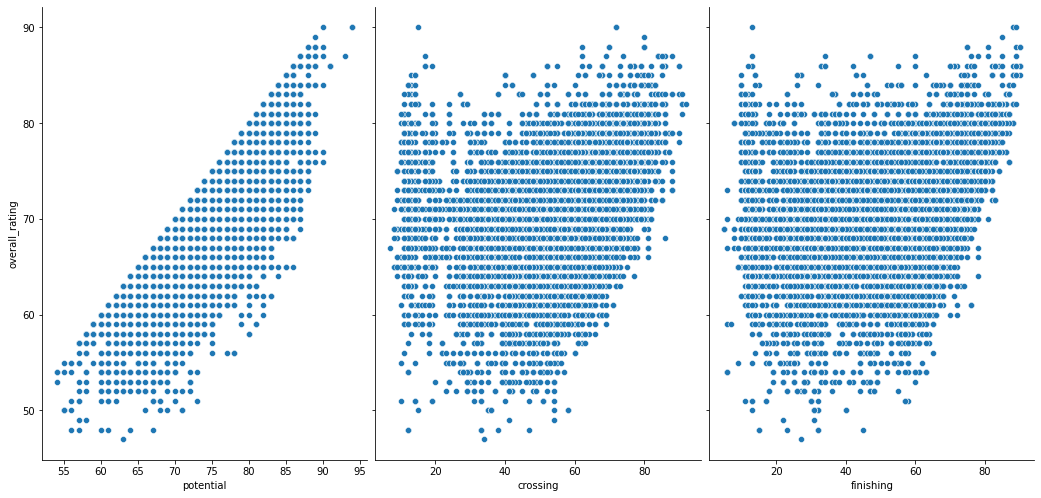

In [52]:
import seaborn as sns
sns.pairplot(data, x_vars=['potential','crossing','finishing'], y_vars='overall_rating', size=7, aspect=0.7)

<hr>



## <font color='midnightblue'> Apply Machine Learning Model </font>

**Apply feature importances Function on the input features to calculate how useful they are at predicting a target variable**


[0.090793   0.03027109 0.03287827 0.03117915 0.03475207 0.0279551
 0.03387811 0.0261233  0.02464268 0.02911784 0.04220827 0.02754528
 0.02775704 0.02583719 0.04782923 0.02547993 0.02892624 0.026295
 0.0290534  0.02854042 0.02868443 0.0284499  0.03293218 0.03426707
 0.03058218 0.02565383 0.03387025 0.03658366 0.03244416 0.01428105
 0.01558222 0.01560645]


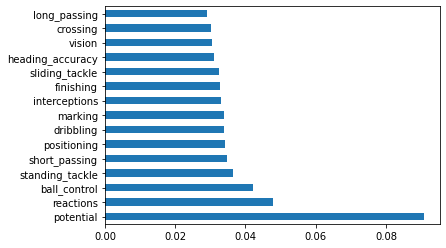

In [56]:
#Use a features selection technique to select those features in
#your data that contribute most to the prediction.
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

**Remove the target feature**

In [57]:
X = data.drop(['overall_rating'],axis=1)[feat_importances.nlargest(15).index]
X.shape

(11891, 15)

**Split The Model Into Train & Test data**




In [58]:
#  from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('shape of X_train:',X_train.shape,'shape of X_test:',X_test.shape,'shape of y_train:',Y_train.shape,'shape of y_test:',Y_test.shape )

shape of X_train: (9512, 15) shape of X_test: (2379, 15) shape of y_train: (9512,) shape of y_test: (2379,)


**Apply LinearRegression method**

In [59]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train,Y_train)
pred = linear.predict(X_test)
linear.score(X_test,Y_test)

0.8285744971531668

In [60]:
print(linear.intercept_)
print(linear.coef_)

7.5920434917584885
[ 0.45951025  0.38576592  0.04913614 -0.00613556 -0.0281963  -0.03745403
 -0.0730687   0.00764016  0.01049362  0.0172375  -0.02398368  0.0362851
  0.02369339  0.04093382  0.03190936]


<hr>


## <font color='midnightblue'>Evaluate the model</font>

In [61]:
from sklearn import metrics
print(metrics.mean_absolute_error(Y_test,pred))

1.9598002518354032


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


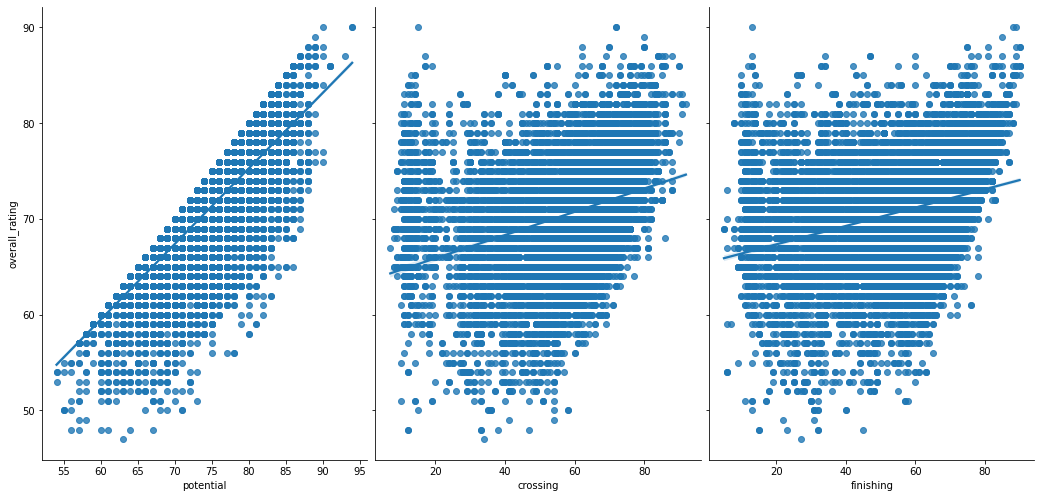

In [88]:
sns.pairplot(data, x_vars=['potential','crossing','finishing'], y_vars='overall_rating', size=7, aspect=0.7, kind='reg') ###################

<hr>

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.
'Pipeline'  Sequentially apply a list of transforms and a final estimator.


In [84]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

In [85]:
pipeline.fit(np.array(X_train), Y_train)
y_pred=pipeline.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [86]:
accuracy_score = pipeline.score(X_train,Y_train)
print('Model Accuracy: ', accuracy_score)

Model Accuracy:  0.9335927410801752


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


### **<font color='rosybrown'> This Model achived accuracy of 93% by using Linear Regression.**</font>

<hr>